# Importación de librerias

In [1]:
# Pandas
import pandas as pd
# Matplotlib
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns

# Importación de dataset

In [2]:
hotel = pd.read_csv('./ReservaHotel.csv')

### Análisis del dataset

In [3]:
hotel.shape

(36275, 19)

In [4]:
hotel.head(5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [5]:
hotel.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [6]:
#Unificacion de personas y noches
hotel['total_persons'] = hotel['no_of_adults'] + hotel['no_of_children']
hotel['total_nights']= hotel['no_of_week_nights'] + hotel['no_of_weekend_nights']

In [7]:
hotel_total = hotel.drop(columns=['no_of_adults','no_of_children','no_of_week_nights','no_of_weekend_nights','Booking_ID'])


In [8]:
hotel_total

,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_persons,total_nights
0,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,2,3
1,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,2,5
2,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,1,3
3,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,2,2
4,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled,3,8
36271,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled,2,4
36272,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled,2,8
36273,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled,2,3


# Gráficos
    Se utilizara el dataframe "hotel_total", el cual se armo sumando el total de personas y el total de dias de reserva.

## Matplotlib

In [9]:
# Cambio de estilo
plt.style.use('bmh')

In [10]:
status=hotel_total.booking_status.value_counts()
status

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

In [11]:
reservas=hotel_total.groupby('booking_status')

In [12]:
segmento=hotel_total.market_segment_type.value_counts()

#### Gráfico 1

Text(0.5, 0, 'Estado')

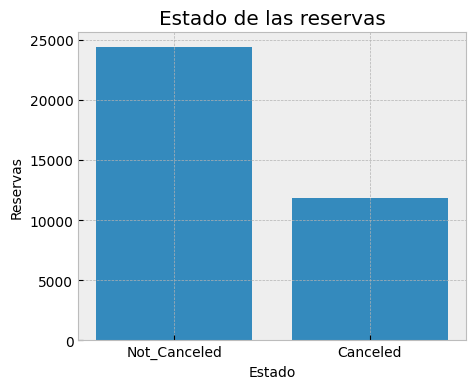

In [13]:
fig, st = plt.subplots(figsize=(5,4))
st.bar(status.index, status)
st.set_title('Estado de las reservas')
st.set_ylabel('Reservas')
st.set_xlabel('Estado')

*En este gráfico se visualiza la cantidad de reservas por estado.*

#### Gráfico 2

Text(0.5, 0, 'Valor Promedio')

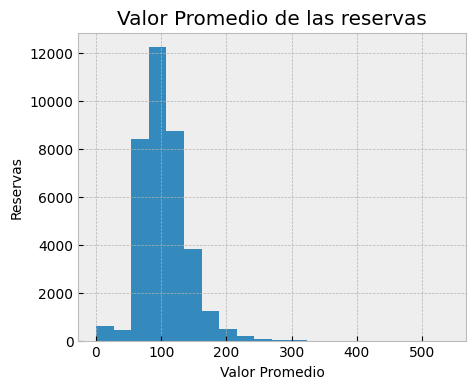

In [14]:
fig, pr = plt.subplots(figsize=(5,4))
pr.hist(x= hotel_total.avg_price_per_room, bins= 20)
pr.set_title('Valor Promedio de las reservas')
pr.set_ylabel('Reservas')
pr.set_xlabel('Valor Promedio')

*Aqui se visualiza un histograma con el valor promedio de las reservas.*

#### Gráfico 3

Text(0.5, 1.0, 'Piechart de distribucion de origen de reservas')

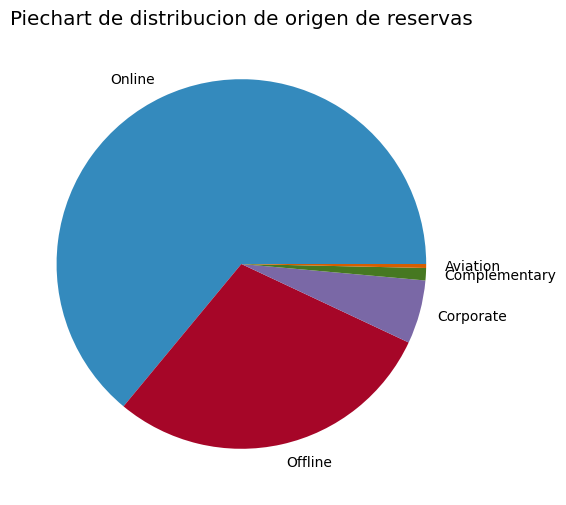

In [15]:
fig, sg = plt.subplots(figsize = (6,6))
sg.pie(segmento.values, labels = segmento.index)
sg.set_title('Piechart de distribucion de origen de reservas')

*Aqui podemos ver como fue la segmentación de las reservas según el tipo.*

## Seaborn

#### Gráfico 1

[Text(0.5, 0, 'Tipo de reserva'),
 Text(0, 0.5, 'Promedio por año'),
 Text(0.5, 1.0, 'Promedio de personas por segmento')]

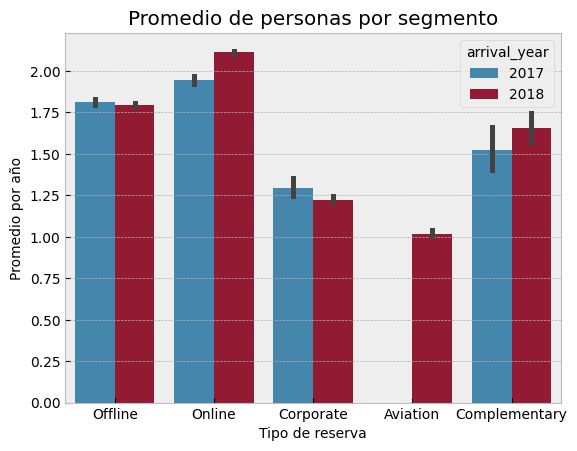

In [42]:
py=sns.barplot(data=hotel_total, x='market_segment_type', y='total_persons', hue = 'arrival_year')
py.set(xlabel='Tipo de reserva', ylabel='Promedio por año', title='Promedio de personas por segmento')

*Promedio de personas que viajan de acuedo al tipo de segmento asociado durante los años 2017 y 2018.*

#### Gráfico 2

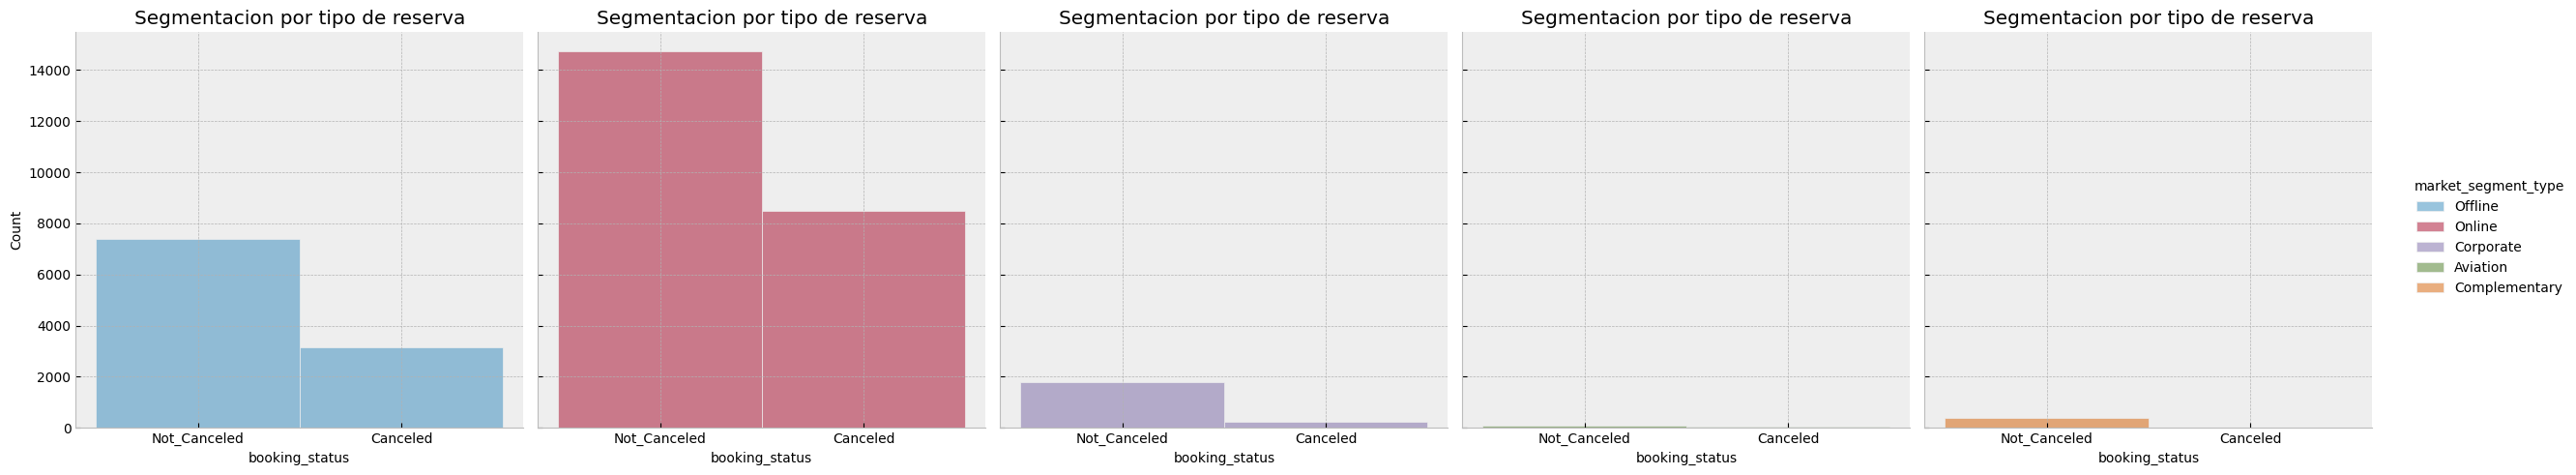

In [41]:
ms=sns.displot(data=hotel_total,x='booking_status', hue='market_segment_type', col='market_segment_type')
ms.set(title= 'Segmentacion por tipo de reserva')

*De acuedo a la segmentación de mercado, el total de reservas canceladas y no canceladas.*

#### Gráfico 3

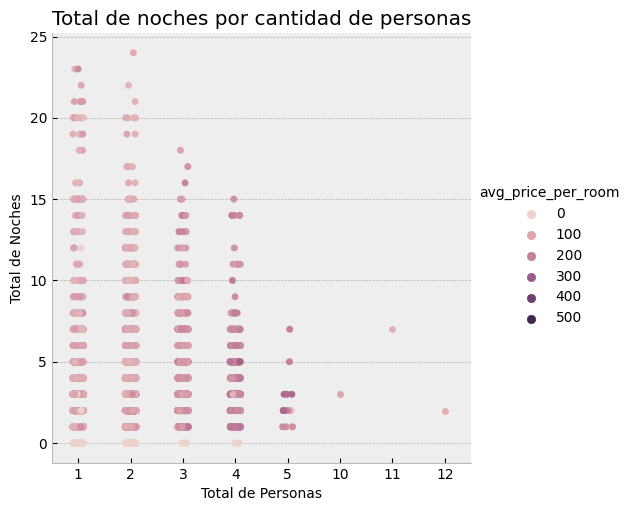

In [39]:
np = sns.catplot(data=hotel_total, x='total_persons', y='total_nights', hue='avg_price_per_room')
np.set(xlabel='Total de Personas', ylabel='Total de Noches', title='Total de noches por cantidad de personas')


*En este gráfico visualizamos la relación que existe entre la cantidad de personas y el total de noches por el que se realizan las reservas. Adicionalmente se añade una diferenciación para los precios promedios por habitación.*